### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

## Preprocessing

In [2]:
# Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Let's check the image shape
train_images[0].shape

(32, 32, 3)

In [4]:
# Now, we want this to have shape (32, 32)
# Let's do that

# Assigning weights to the different colors: red, green, blue
rgb_weights = [0.2989, 0.5870, 0.1140]

# Picking one image for testing purposes
test = train_images[0]

# Let's combine this three colors into one (gray-scaled)
to_plot = np.dot(test, rgb_weights)
to_plot.shape

(32, 32)

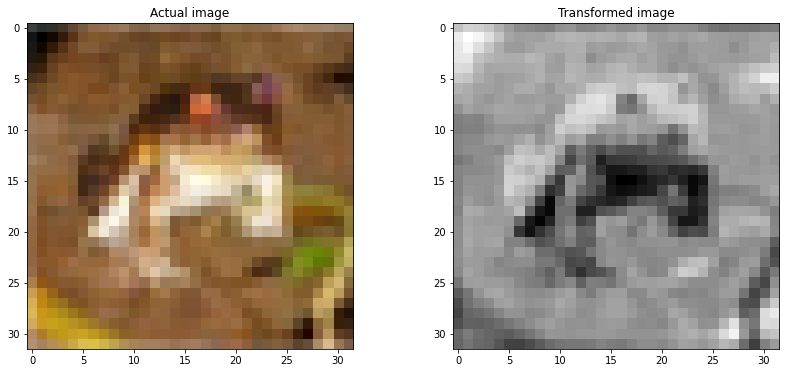

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
ax1.imshow(train_images[0], cmap = plt.cm.binary)
ax2.imshow(to_plot, cmap = plt.cm.binary)

ax1.set_title("Actual image")
ax2.set_title("Transformed image")

#plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# Well, it did work
# Now let's do that for the full array of images

train_images_2 = np.dot(train_images, rgb_weights)
test_images_2 = np.dot(test_images, rgb_weights)

## Exercise 1

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [7]:
model1 = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (32, 32, 1),
                  padding = "same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")

])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
____________________________________________________

In [8]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
train_images_3 = train_images_2.reshape(50000, 32, 32, 1)
test_images_3 = test_images_2.reshape(10000, 32, 32, 1)

In [10]:
history_model1 = model1.fit(train_images_3, train_labels, epochs = 5, validation_split = .1)

Epoch 1/5
1407/1407 [==============================] - 12s 8ms/step - loss: 3.0270 - accuracy: 0.0996 - val_loss: 2.3030 - val_accuracy: 0.0958
Epoch 2/5
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 3/5
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0958
Epoch 4/5
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3031 - val_accuracy: 0.0958
Epoch 5/5
1407/1407 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0970


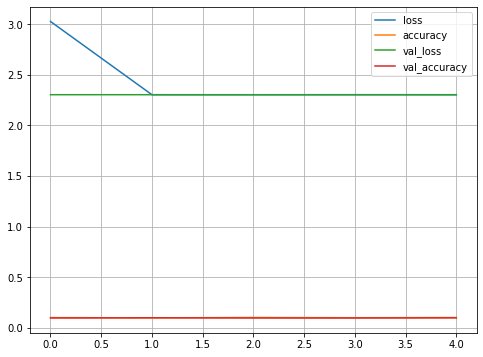

In [11]:
model1_stats = pd.DataFrame(history_model1.history)

model1_stats.plot(figsize = (8, 6))
plt.grid(True)
plt.show()

## Exercise 2

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [12]:
model2 = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (32, 32, 1),
                  padding = "same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(16, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")

])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [13]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history_model2 = model2.fit(train_images_3, train_labels, epochs = 5, validation_split = .1)

Epoch 1/5
1407/1407 [==============================] - 13s 9ms/step - loss: 2.6004 - accuracy: 0.0981 - val_loss: 2.3029 - val_accuracy: 0.0958
Epoch 2/5
1407/1407 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1038
Epoch 3/5
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 4/5
1407/1407 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.0976
Epoch 5/5
1407/1407 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0976


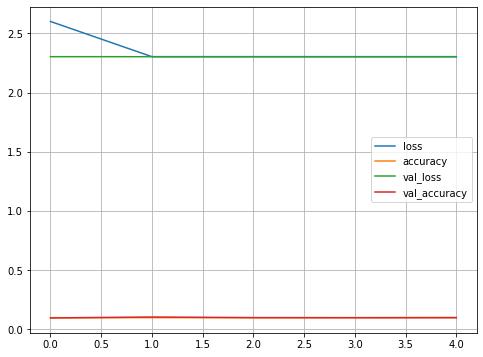

In [15]:
model2_stats = pd.DataFrame(history_model2.history)

model2_stats.plot(figsize = (8, 6))
plt.grid(True)
plt.show()

Both models perform quite poorly. Let's try it adding back the colors.

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [16]:
train_images.shape

(50000, 32, 32, 3)

In [17]:
model3 = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (32, 32, 3),
                  padding = "same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")

])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
__________________________________________________

In [18]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history_model3 = model3.fit(train_images, train_labels, epochs = 5, validation_split = .1)

Epoch 1/5
1407/1407 [==============================] - 12s 8ms/step - loss: 2.7997 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.0970
Epoch 2/5
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3029 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.0976
Epoch 3/5
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3031 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0950
Epoch 4/5
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3029 - accuracy: 0.0958 - val_loss: 2.3027 - val_accuracy: 0.1024
Epoch 5/5
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3033 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.0950


Even after adding color back to the images, the ANNs is unable to find patterns. To be fair, the quality of the images is very poor.